In [2]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=d84a9aae4878bd556ebdc1a6086ddbaca7cdba93096c2e28507c0d13901e5808
  Stored in directory: c:\users\alexe\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [5]:
weather_api_key = "66cf4bcae9c499b1f9df65136552db87"
weather_api_key

'66cf4bcae9c499b1f9df65136552db87'

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
units = "impirial"
query_url = url +"&units=" + units + "&q="

allcities = []
allcountries = []
clouds = []
dates = []
maxtemperature = []
wind = []
humidity = []
lat_list = []
lng_list = []

indexcount = 0
setcount = 1
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66cf4bcae9c499b1f9df65136552db87'

In [7]:
print("Beginning Data Retrieval ")
print("-----------------------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        allcities.append(response["name"])
        clouds.append(response["clouds"]["all"])
        allcountries.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        maxtemperature.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        if indexcount > 49:
            indexcount = 0
            setcount = setcount + 1
    
        else:
            indexcount = indexcount + 1
            
        print(f"Processing Record {indexcount} of Set {setcount} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : tarbagatay
Processing Record 2 of Set 1 : bambous virieux
City not found. Skipping...
City not found. Skipping...
Processing Record 3 of Set 1 : yumen
Processing Record 4 of Set 1 : port alfred
Processing Record 5 of Set 1 : palauig
Processing Record 6 of Set 1 : puerto ayora
Processing Record 7 of Set 1 : mataura
Processing Record 8 of Set 1 : barrow
Processing Record 9 of Set 1 : hilo
Processing Record 10 of Set 1 : jamestown
Processing Record 11 of Set 1 : punta arenas
Processing Record 12 of Set 1 : yellowknife
Processing Record 13 of Set 1 : avarua
Processing Record 14 of Set 1 : tombouctou
Processing Record 15 of Set 1 : necochea
Processing Record 16 of Set 1 : bengkulu
Processing Record 17 of Set 1 : bluff
Processing Record 18 of Set 1 : thompson
Processing Record 19 of Set 1 : atuona
Processing Record 20 of Set 1 : seoul
Processing Record 21 of Set 1 : ushuaia
Processing Record 22 of Set 1 : 

Processing Record 33 of Set 4 : sao filipe
Processing Record 34 of Set 4 : adrar
Processing Record 35 of Set 4 : pevek
Processing Record 36 of Set 4 : makakilo city
Processing Record 37 of Set 4 : araouane
Processing Record 38 of Set 4 : ponta delgada
Processing Record 39 of Set 4 : monroe
Processing Record 40 of Set 4 : torbay
Processing Record 41 of Set 4 : tucuma
Processing Record 42 of Set 4 : pitelino
Processing Record 43 of Set 4 : borogontsy
Processing Record 44 of Set 4 : teruel
Processing Record 45 of Set 4 : harrai
Processing Record 46 of Set 4 : petropavlovsk-kamchatskiy
City not found. Skipping...
Processing Record 47 of Set 4 : khotyn
Processing Record 48 of Set 4 : ketchikan
Processing Record 49 of Set 4 : haines junction
Processing Record 50 of Set 4 : moba
Processing Record 0 of Set 5 : taoudenni
Processing Record 1 of Set 5 : chuy
Processing Record 2 of Set 5 : nome
Processing Record 3 of Set 5 : shahr-e babak
Processing Record 4 of Set 5 : muhlhausen
Processing Record

Processing Record 18 of Set 8 : castrillon
Processing Record 19 of Set 8 : sept-iles
Processing Record 20 of Set 8 : dubti
Processing Record 21 of Set 8 : denpasar
Processing Record 22 of Set 8 : yeppoon
Processing Record 23 of Set 8 : camacha
Processing Record 24 of Set 8 : port hardy
Processing Record 25 of Set 8 : rio verde de mato grosso
Processing Record 26 of Set 8 : chilliwack
City not found. Skipping...
Processing Record 27 of Set 8 : coquimbo
Processing Record 28 of Set 8 : tymovskoye
Processing Record 29 of Set 8 : garden city
Processing Record 30 of Set 8 : nhulunbuy
Processing Record 31 of Set 8 : billings
Processing Record 32 of Set 8 : waycross
Processing Record 33 of Set 8 : rassvet
City not found. Skipping...
Processing Record 34 of Set 8 : storm lake
Processing Record 35 of Set 8 : koungou
Processing Record 36 of Set 8 : lashio
Processing Record 37 of Set 8 : port-gentil
Processing Record 38 of Set 8 : vung tau
Processing Record 39 of Set 8 : heze
Processing Record 40 

Processing Record 8 of Set 12 : santiago del estero
Processing Record 9 of Set 12 : kigoma
Processing Record 10 of Set 12 : mudgee
Processing Record 11 of Set 12 : san fernando
Processing Record 12 of Set 12 : kjollefjord
Processing Record 13 of Set 12 : curuguaty
-----------------------------
Data Retrieval Complete
-----------------------------


In [8]:
#make DF
weatherDF = pd.DataFrame({ "City" : allcities,"Lat" : lat_list,"Lng" : lng_list,"Max Temp" : maxtemperature,
                          "Humidity" : humidity, "Cloudiness" : clouds,"Wind Speed" : wind, 
                          "Country" : allcountries,"Date" : dates})
weatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tarbagatay,51.4803,107.3602,-0.40,85,29,1.74,RU,1615060759
1,Bambous Virieux,-20.3428,57.7575,82.00,78,75,8.05,MU,1615060759
2,Yumen,40.2833,97.2000,32.05,79,16,1.90,CN,1615060760
3,Port Alfred,-33.5906,26.8910,68.00,91,0,1.99,ZA,1615060761
4,Palauig,15.4350,119.9045,77.31,69,1,5.88,PH,1615060761


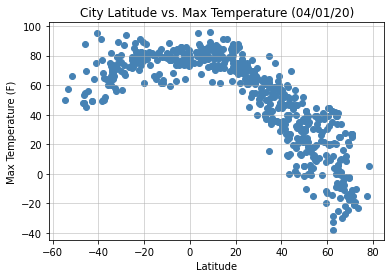

In [9]:
#LAT VS TEMP
plt.scatter(weatherDF["Lat"], weatherDF["Max Temp"], color = "steelblue")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

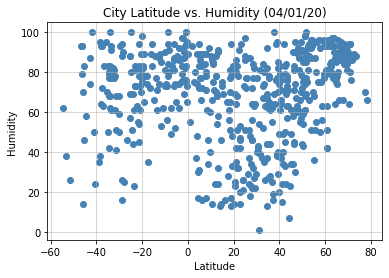

In [10]:
#LAT VS HUMIDITY
plt.scatter(weatherDF["Lat"], weatherDF["Humidity"], color = "steelblue")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

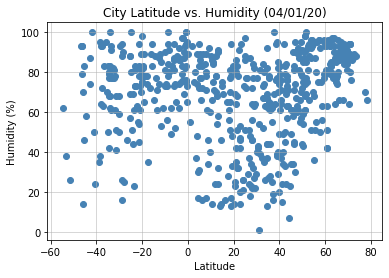

In [11]:
#LAT VS HUMIDITY
plt.scatter(weatherDF["Lat"], weatherDF["Humidity"], color = "steelblue")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

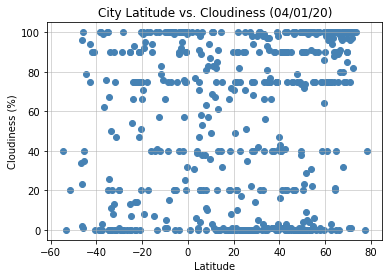

In [12]:
#LAT VS CLOUDINESS
plt.scatter(weatherDF["Lat"], weatherDF["Cloudiness"], color = "steelblue")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

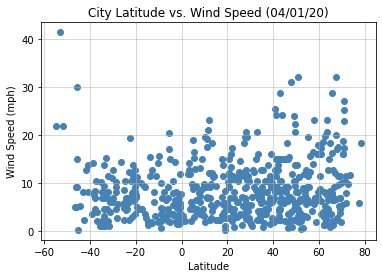

In [13]:
#LAT VS WIND SPEED
plt.scatter(weatherDF["Lat"], weatherDF["Wind Speed"], color = "steelblue")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

In [14]:
#----------------------REGRESSIONS-------------------------#

In [15]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
from scipy import stats

def linearregression(x,y):
    print(f"The r-squared is :  ")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regvalues = x * slope + intercept
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regvalues,"r-")
    return equation
def annotate(equation, a, b):
    plt.annotate(equation,(a,b),fontsize=15,color="red")

In [16]:
#make dataframes with .loc for each hemisphere
northhemi = weatherDF.loc[weatherDF["Lat"] >= 0]
southhemi = weatherDF.loc[weatherDF["Lat"] < 0]
x_values = northhemi['Max Temp']
y_values = northhemi['Lat']

#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


In [17]:
southhemi

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bambous Virieux,-20.3428,57.7575,82.00,78,75,8.05,MU,1615060759
3,Port Alfred,-33.5906,26.8910,68.00,91,0,1.99,ZA,1615060761
5,Puerto Ayora,-0.7393,-90.3518,80.60,83,75,5.75,EC,1615060761
6,Mataura,-46.1927,168.8643,48.00,93,23,5.01,NZ,1615060761
10,Punta Arenas,-53.1500,-70.9167,57.20,38,0,41.43,CL,1615060762
...,...,...,...,...,...,...,...,...,...
560,Port Lincoln,-34.7333,135.8667,63.05,83,100,6.82,AU,1615060878
568,Santiago del Estero,-27.7951,-64.2615,94.08,25,0,5.61,AR,1615060880
569,Kigoma,-4.8769,29.6267,73.40,88,75,1.92,TZ,1615060880
570,Mudgee,-32.5943,149.5871,57.99,82,8,4.61,AU,1615060880


The r-squared is :  


Text(0, 0.5, 'Max Temp (F)')

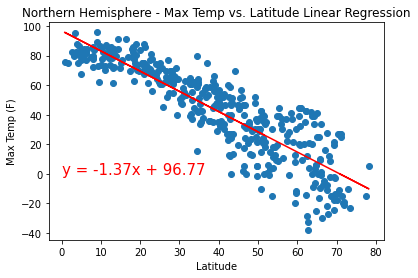

In [18]:
#Northern Hemisphere - Temperature (F) vs. Latitude

equation = linearregression(northhemi["Lat"], northhemi["Max Temp"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

The r-squared is :  


Text(0, 0.5, 'Max Temp (F)')

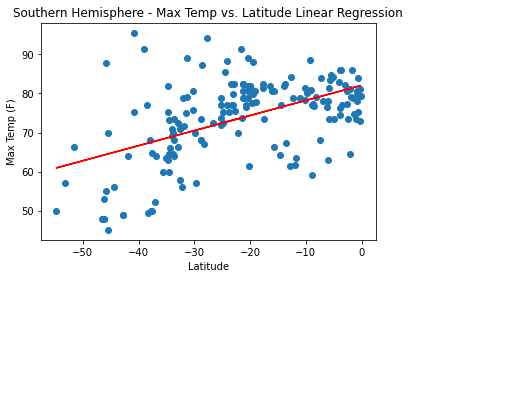

In [19]:
#Southern Hemisphere - Temperature (F) vs. Latitude

equation = linearregression(southhemi["Lat"], southhemi["Max Temp"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

The r-squared is :  


Text(0, 0.5, 'Humidity (%)')

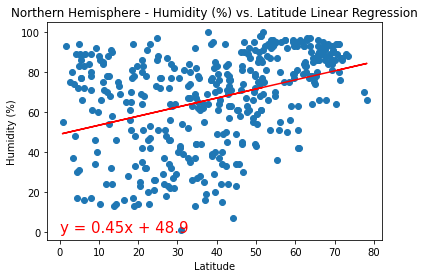

In [20]:
#Northern Hemisphere - Humidity (%) vs. Latitude

equation = linearregression(northhemi["Lat"], northhemi["Humidity"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

The r-squared is :  


Text(0, 0.5, 'Humidity (%)')

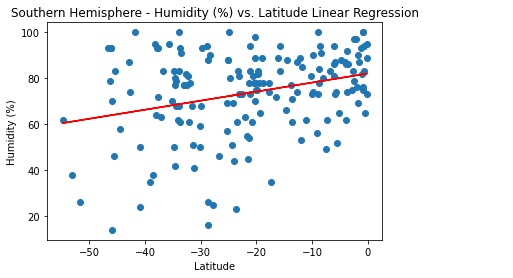

In [21]:
#Southern Hemisphere - Humidity (%) vs. Latitude
equation = linearregression(southhemi["Lat"], southhemi["Humidity"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

The r-squared is :  


Text(0, 0.5, 'Cloudiness (%)')

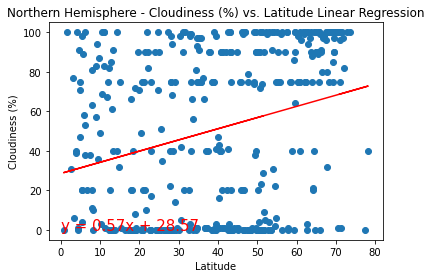

In [22]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
equation = linearregression(northhemi["Lat"], northhemi["Cloudiness"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

The r-squared is :  


Text(0, 0.5, 'Cloudiness (%)')

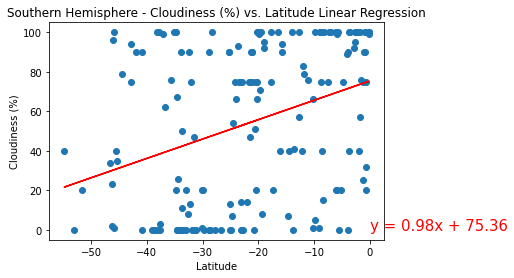

In [23]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

equation = linearregression(southhemi["Lat"], southhemi["Cloudiness"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

The r-squared is :  


Text(0, 0.5, 'Wind Speed (mph)')

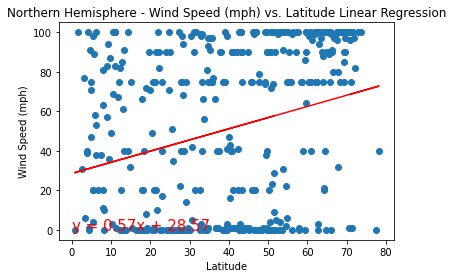

In [24]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

equation = linearregression(northhemi["Lat"], northhemi["Cloudiness"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

The r-squared is :  


Text(0, 0.5, 'Wind Speed (mph)')

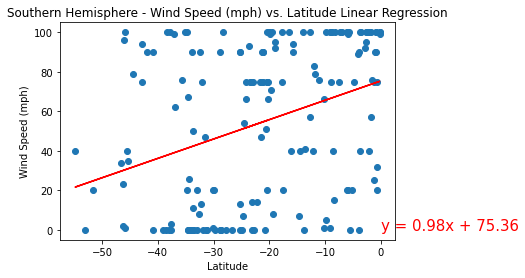

In [25]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

equation = linearregression(southhemi["Lat"], southhemi["Cloudiness"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

Observations:
1) Wind speed does not seem to be correlated with latitude, for the data is very scattered and I cannot find a clear relationship. There seems to be slightly more data correlation between high wind MPH and high latitude but not enough to establish a relationship.

2) There is less variation in max temperature in the Southern Hemisphere which I found interesting. Possibly this is due to the fact that there is much more ocean instead of land, which could cause less variation. The max temperatures in the Northern Hemisphere could have more variation due to the land masses in higher latitudes. Examples include Russia, Greenland, and Canada.

3) The majority of the world faces similar wind speeds which is probably why there is not a lot of correlation between wind speed and latitude. Cloudiness is somewhat similar, although the distribution is a little more scattered, probably another reason I could not find much correlation with cloudiness and latitude. It is interesting though how it seems like a large chunk of cities are above the 70% cloudiness level at higher latitudes in the Northern Hemisphere.